In [6]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=20, # 20個生成
                           n_features=2, # 2次元
                           n_classes=3, # 3クラス
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           random_state=8   # 乱数種（再現用）
                           )

In [7]:
X, y

(array([[ 0.96625625, -1.16083   ],
        [-0.8956197 , -1.1904577 ],
        [-1.12244282, -1.49551075],
        [ 0.19381815,  0.71599453],
        [-0.81613811,  2.50559359],
        [-2.15730517, -0.38081097],
        [ 1.06520392, -1.06613765],
        [ 1.19850953, -1.19674272],
        [-1.28835506, -0.03837451],
        [-0.64803468,  2.03441301],
        [ 0.87697793, -0.61834883],
        [ 0.88418282, -0.59566976],
        [-2.08388511,  0.74825788],
        [ 0.9769429 , -1.30079452],
        [-1.71615661, -1.75243316],
        [-1.3018617 , -0.99043422],
        [-2.03271691,  0.38570548],
        [ 1.05087256, -1.47846795],
        [-0.43685499,  0.32573499],
        [-1.51666496, -1.16409828]]),
 array([1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2]))

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.set_cmap(plt.cm.brg)

<Figure size 432x288 with 0 Axes>

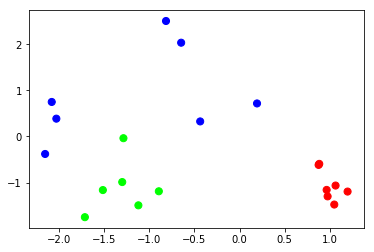

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [10]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [12]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)

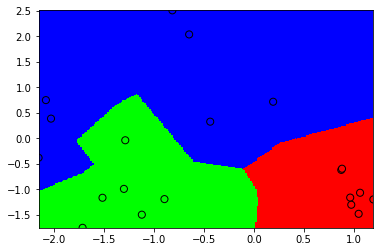

In [14]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor='k')

plotBoundary(X, clf)

In [15]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

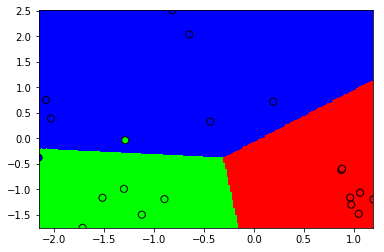

In [17]:
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)

In [18]:
from sklearn import svm 
clf = svm.SVC(kernel='linear', C=10)

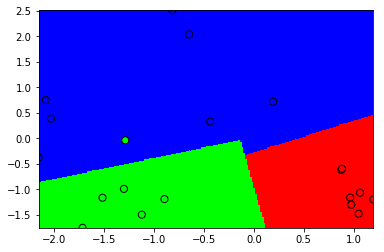

In [19]:
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)

In [22]:
# 非線形なSVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=10)

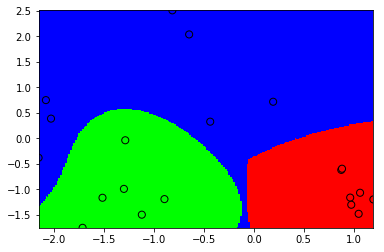

In [23]:
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)

# 多クラス識別 : One-vs-Rest(ロジスティック回帰)

In [24]:
# 境界線を引く関数の定義

def plotBoundary2(X, clf, boundary=True):
    colors = ['k'];
    linestyles = ['-'];
    levels = [0];

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape

        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels) # draw lines (level=0:boundary)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

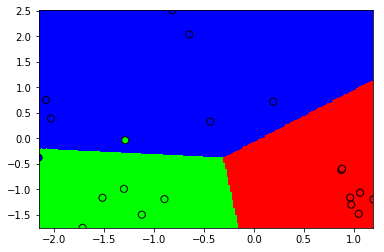

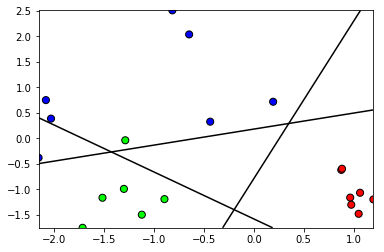

In [25]:
clf = linear_model.LogisticRegression()

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary(X, clf)
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary2(X, clf)

In [26]:
# 境界線を引く関数の定義

def plotBoundary3(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [-1,0,1];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    print(Z.shape)
    n_classes = Z.shape[1]
    
    for c in range(n_classes):
        Zc = Z[:,c].reshape(XX.shape) # just reshape
        plt.show()
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            plt.colorbar()
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

(40000, 3)


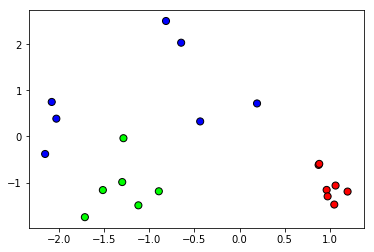

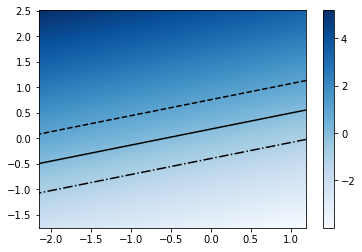

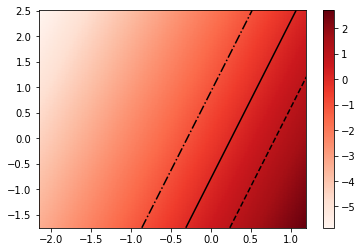

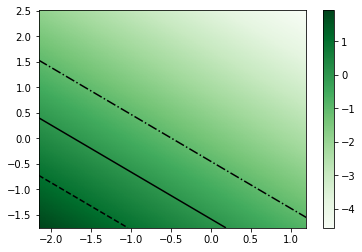

In [27]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolor="k")
plotBoundary3(X, clf)

In [28]:
# 境界線を引く関数の定義

import numpy.ma as ma # MaskedArray

def plotBoundary4(X, clf, mesh=True, boundary=True):
    colors = ['k'];
    linestyles = ['-.', '-', '--'];
    levels = [-1,0,1];
    cmaps = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    n_classes = Z.shape[1]
    
    Zmax = Z.argmax(axis=1).reshape(XX.shape)
    
    for c in range(n_classes):
        Zc = ma.array(Z[:,c].reshape(XX.shape), mask=(Zmax != c))
        
        if mesh:
            plt.pcolormesh(XX, YY, Zc, zorder=-10, cmap=cmaps[c])
            
        if boundary:
            plt.contour(XX, YY, Zc, 
                        colors=colors,
                        linestyles=linestyles,
                        levels=levels)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

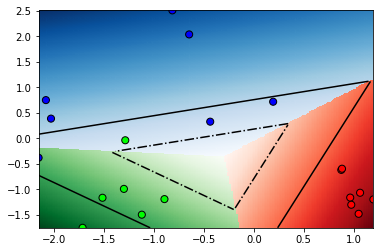

In [29]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary4(X, clf)

# 多クラス識別 : One-vs-Rest(SVM)

In [30]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr', C=10)

In [31]:
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(40000, 3)


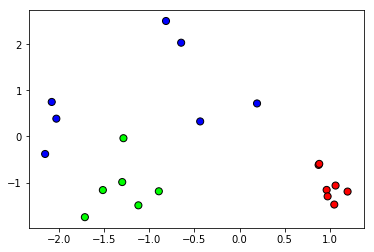

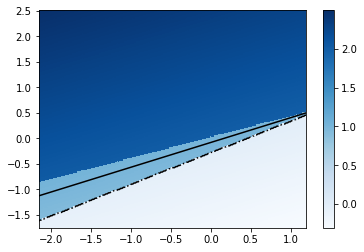

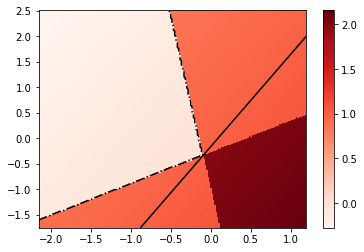

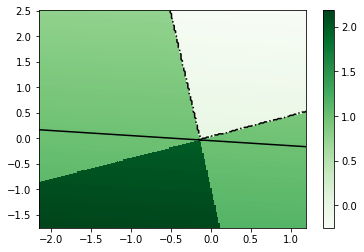

/opt/conda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


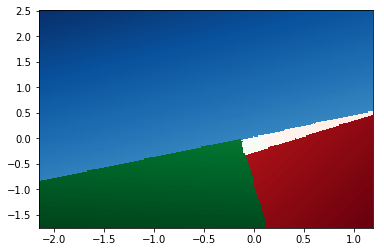

In [32]:
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
plotBoundary3(X, clf)
plt.show()

plotBoundary4(X, clf) 